In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
df_results = pd.read_csv("results.csv")
df_stats = pd.read_csv("stats.csv")

In [ ]:
df_results

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007
...,...,...,...,...,...,...
4555,Newcastle United,Chelsea,3.0,0.0,H,2017-2018
4556,Southampton,Manchester City,0.0,1.0,A,2017-2018
4557,Swansea City,Stoke City,1.0,2.0,A,2017-2018
4558,Tottenham Hotspur,Leicester City,5.0,4.0,H,2017-2018


In [ ]:
df_stats

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,765.0,165.0,22619.0,21.0,6.0,416.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,694.0,150.0,22775.0,26.0,1.0,439.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,800.0,227.0,24639.0,37.0,4.0,379.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,598.0,136.0,20368.0,33.0,3.0,402.0,0.0,27.0,14.0,2017-2018


In [ ]:
df_stats.columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'saves', 'outfielder_block', 'interception',
       'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',
       'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_through_ball', 'total_long_balls', 'backward_pass',
       'total_cross', 'corner_taken', 'touches', 'big_chance_missed',
       'clearance_off_line', 'dispossessed', 'penalty_save',
       'total_high_claim', 'punches', 'season'],
      dtype='object')

In [ ]:
df_stats.corr()["wins"]

wins                    1.000000
losses                 -0.890199
goals                   0.899236
total_yel_card         -0.211276
total_red_card         -0.084818
total_scoring_att       0.753944
ontarget_scoring_att    0.825577
hit_woodwork            0.512426
att_hd_goal             0.354752
att_pen_goal            0.398314
att_freekick_goal       0.296696
att_ibox_goal           0.869687
att_obox_goal           0.580104
goal_fastbreak          0.519834
total_offside           0.107766
clean_sheet             0.768052
goals_conceded         -0.808909
saves                  -0.078303
outfielder_block       -0.564550
interception           -0.047315
total_tackle            0.088477
last_man_tackle        -0.021521
total_clearance        -0.243472
head_clearance         -0.166257
own_goals              -0.243475
penalty_conceded       -0.293302
pen_goals_conceded     -0.299222
total_pass              0.701707
total_through_ball      0.488155
total_long_balls       -0.228135
backward_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


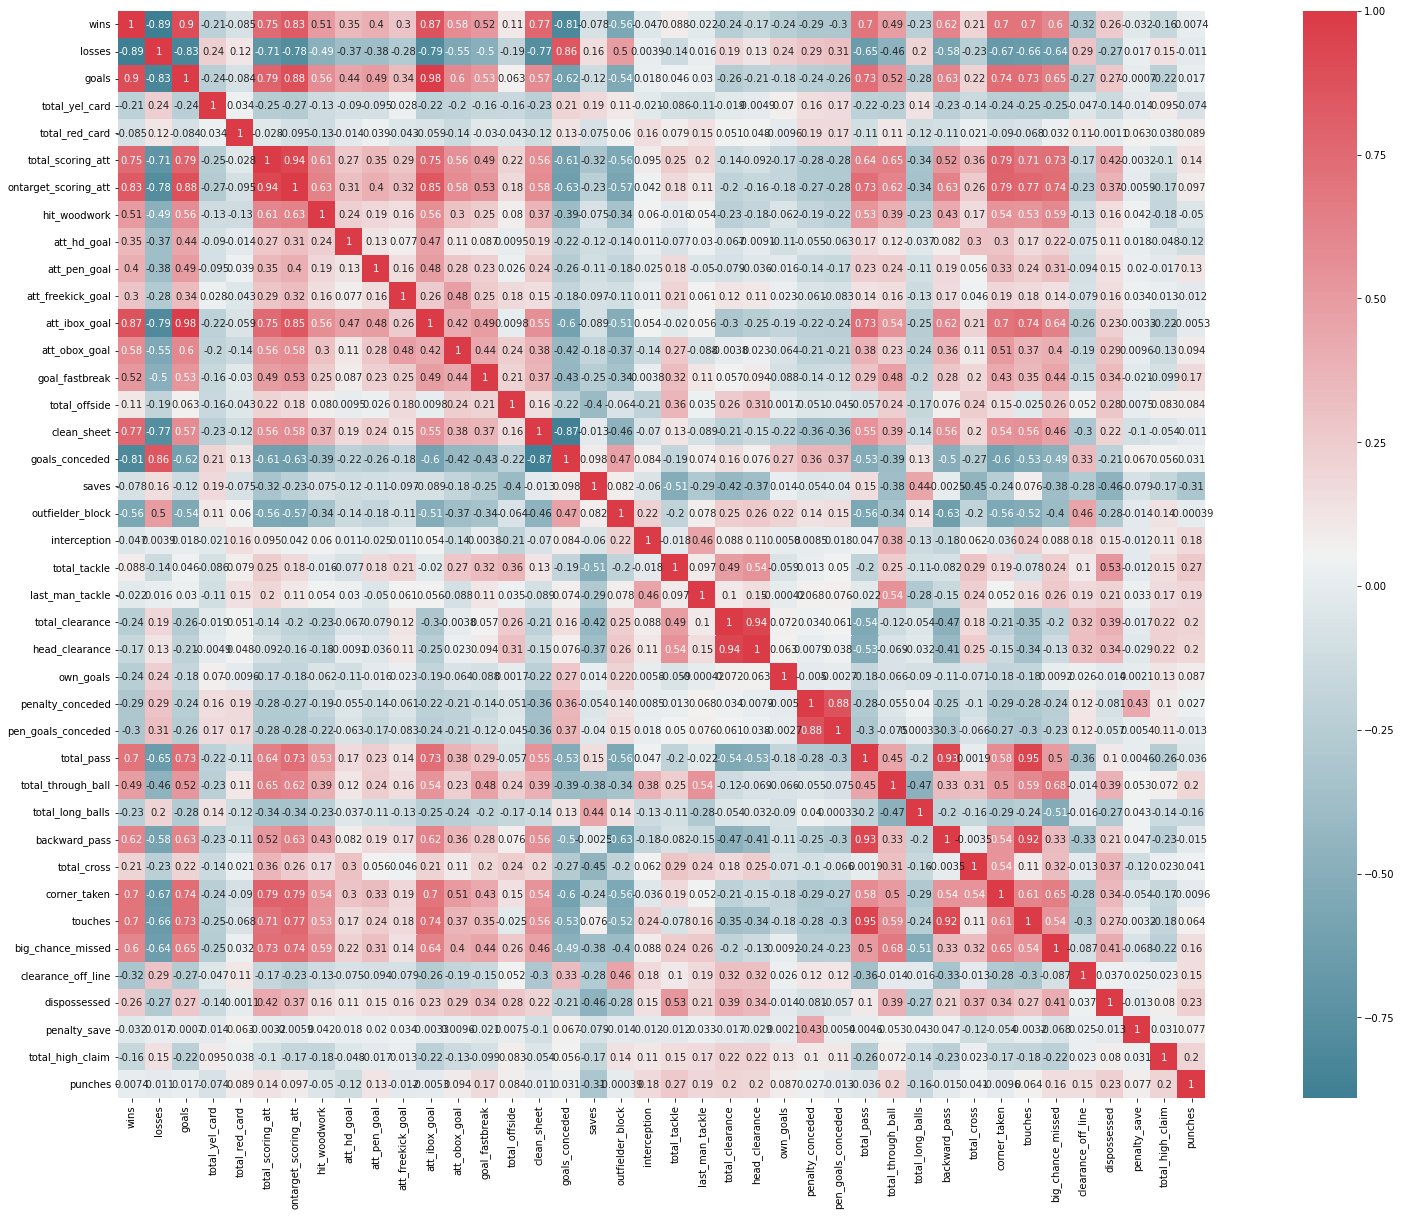

In [ ]:
f, ax = plt.subplots(figsize=(35, 20))
corr = df_stats.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True, ax=ax)

In [ ]:
df_champs = df_stats.iloc[[0,20,40,60,80,100,120,140,160,180,200,220]]
df_champs

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
20,Manchester United,27.0,5.0,80.0,51.0,2.0,696.0,260.0,16.0,12.0,...,936.0,261.0,26620.0,NaN,10.0,627.0,0.0,47.0,23.0,2007-2008
40,Manchester United,28.0,4.0,68.0,61.0,5.0,715.0,230.0,9.0,7.0,...,1039.0,257.0,30077.0,NaN,3.0,579.0,0.0,56.0,22.0,2008-2009
60,Chelsea,27.0,6.0,103.0,54.0,5.0,834.0,288.0,13.0,16.0,...,1083.0,286.0,28914.0,NaN,3.0,503.0,1.0,87.0,30.0,2009-2010
80,Manchester United,23.0,4.0,78.0,56.0,3.0,618.0,212.0,15.0,18.0,...,1005.0,243.0,26671.0,50.0,2.0,471.0,0.0,45.0,16.0,2010-2011
100,Manchester City,28.0,5.0,93.0,51.0,5.0,738.0,250.0,21.0,10.0,...,843.0,269.0,28620.0,65.0,6.0,480.0,1.0,39.0,21.0,2011-2012
120,Manchester United,28.0,5.0,86.0,57.0,1.0,561.0,213.0,24.0,14.0,...,962.0,218.0,27264.0,65.0,5.0,506.0,0.0,38.0,28.0,2012-2013
140,Manchester City,27.0,6.0,102.0,72.0,1.0,673.0,238.0,19.0,10.0,...,892.0,283.0,28341.0,59.0,0.0,411.0,0.0,64.0,31.0,2013-2014
160,Chelsea,26.0,3.0,73.0,73.0,4.0,564.0,210.0,15.0,10.0,...,682.0,226.0,27861.0,40.0,2.0,476.0,0.0,73.0,13.0,2014-2015
180,Leicester City,23.0,3.0,68.0,48.0,3.0,522.0,179.0,11.0,11.0,...,762.0,197.0,21710.0,61.0,7.0,366.0,0.0,49.0,22.0,2015-2016


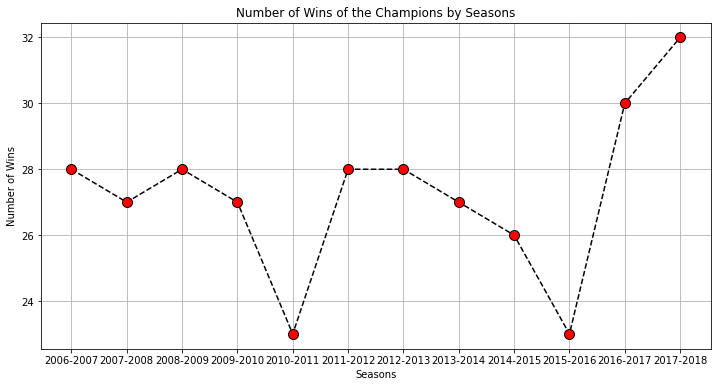

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(df_champs["season"], df_champs["wins"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title("Number of Wins of the Champions by Seasons")  
plt.xlabel("Seasons")  
plt.ylabel("Number of Wins")
plt.grid()
plt.show()

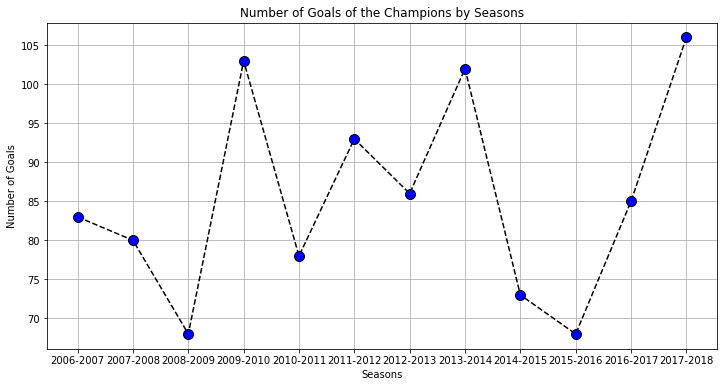

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(df_champs["season"], df_champs["goals"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title("Number of Goals of the Champions by Seasons")  
plt.xlabel("Seasons")  
plt.ylabel("Number of Goals")
plt.grid()
plt.show()

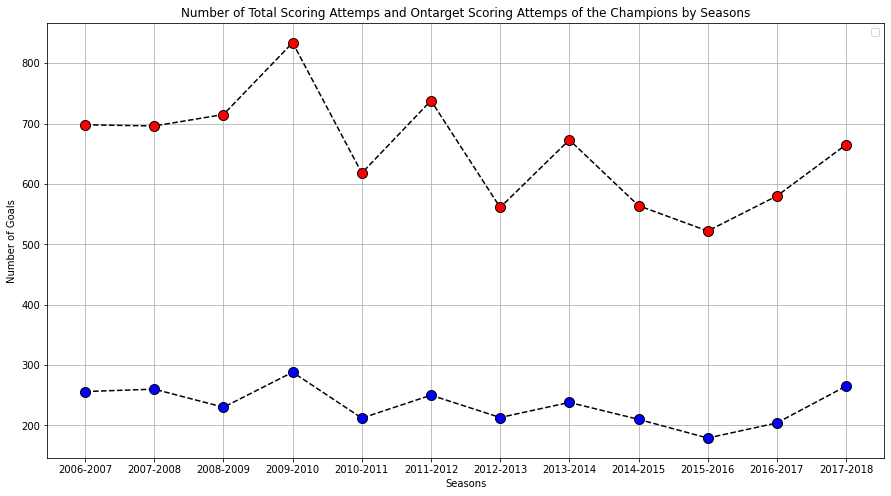

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

l1 = ax.plot(df_champs["season"], df_champs["total_scoring_att"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="red", markersize=10)

l2 = ax.plot(df_champs["season"], df_champs["ontarget_scoring_att"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="blue", markersize=10)
plt.title("Number of Total Scoring Attemps and Ontarget Scoring Attemps of the Champions by Seasons")  
plt.xlabel("Seasons")  
plt.ylabel("Number of Goals")
ax.legend()
ax.grid()
plt.show()

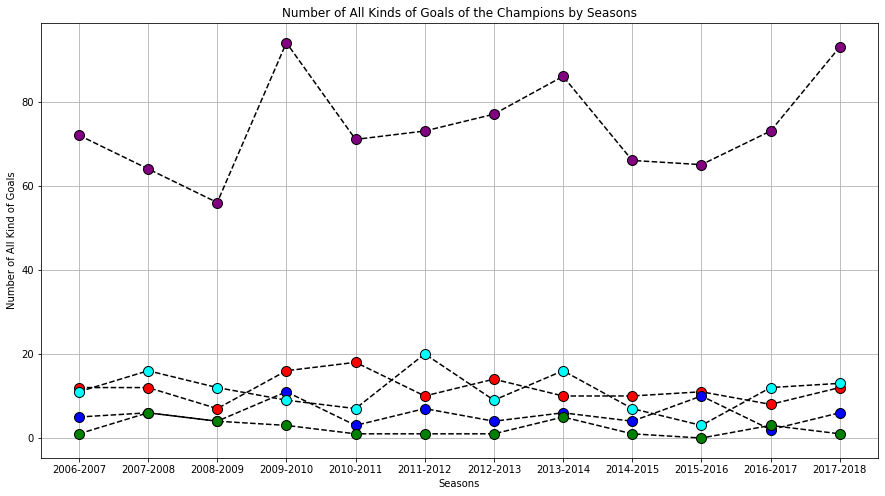

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

l1 = ax.plot(df_champs["season"], df_champs["att_hd_goal"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="red", markersize=10)

l2 = ax.plot(df_champs["season"], df_champs["att_pen_goal"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="blue", markersize=10)

l3 = ax.plot(df_champs["season"], df_champs["att_freekick_goal"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="green", markersize=10)

l4 = ax.plot(df_champs["season"], df_champs["att_ibox_goal"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="purple", markersize=10)

l5 = ax.plot(df_champs["season"], df_champs["att_obox_goal"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="cyan", markersize=10)


plt.title("Number of All Kinds of Goals of the Champions by Seasons")  
plt.xlabel("Seasons")  
plt.ylabel("Number of All Kind of Goals")
plt.grid()
plt.show()

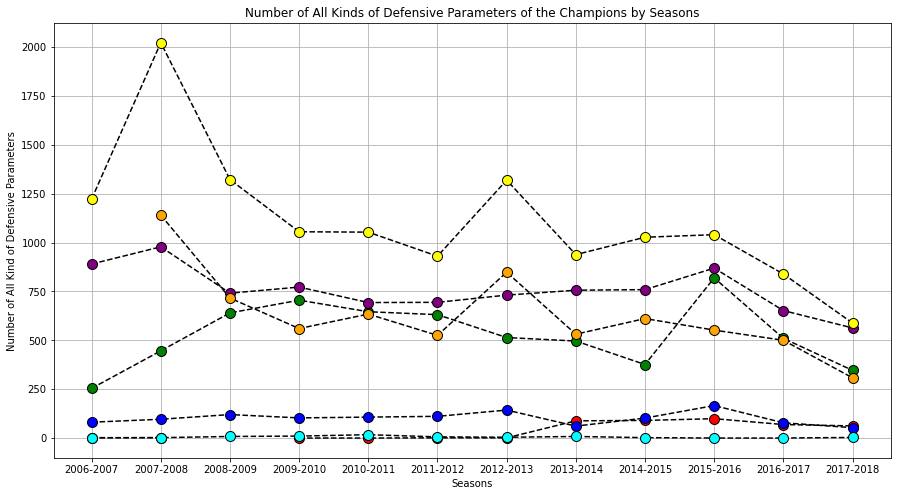

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

l1 = ax.plot(df_champs["season"], df_champs["saves"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="red", markersize=10)

l2 = ax.plot(df_champs["season"], df_champs["outfielder_block"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="blue", markersize=10)

l3 = ax.plot(df_champs["season"], df_champs["interception"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="green", markersize=10)

l4 = ax.plot(df_champs["season"], df_champs["total_tackle"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="purple", markersize=10)

l5 = ax.plot(df_champs["season"], df_champs["last_man_tackle"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="cyan", markersize=10)

l6 = ax.plot(df_champs["season"], df_champs["total_clearance"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="yellow", markersize=10)

l7 = ax.plot(df_champs["season"], df_champs["head_clearance"], color='black', linestyle='dashed', marker='o',  
         markerfacecolor="orange", markersize=10)


plt.title("Number of All Kinds of Defensive Parameters of the Champions by Seasons")  
plt.xlabel("Seasons")  
plt.ylabel("Number of All Kind of Defensive Parameters")
plt.grid()
plt.show()

In [ ]:
df_stats = df_stats.dropna()

In [ ]:
data=df_stats.drop(["season","team"],axis=1)
label=df_stats["season"]

X_train,X_remain,y_train,y_remain=train_test_split(data,label,random_state=0,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_remain,y_remain,random_state=0,test_size=0.5)

#model creation
model=DecisionTreeClassifier(criterion="entropy")

#perform CV
accuracies=cross_val_score(model,X_train,y_train,cv=9 ,scoring="accuracy")
accuracies

array([0.4       , 0.6       , 0.35714286, 0.5       , 0.28571429,
       0.35714286, 0.42857143, 0.42857143, 0.64285714])

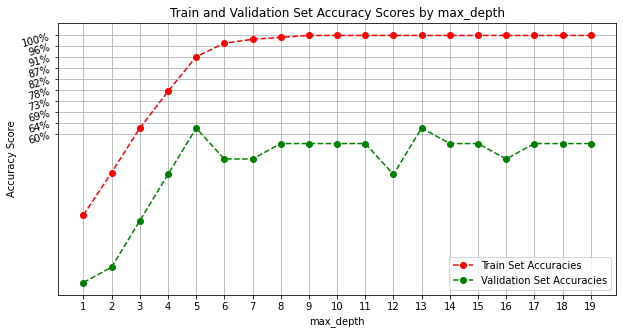

In [ ]:
max_depth_vals=np.arange(1,20)



train_set_accuracies = []
val_set_accuracies = []

for depth in max_depth_vals:
  model = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  train_set_accuracies.append(accuracy_score(y_train, train_preds))
  val_set_accuracies.append(accuracy_score(y_val, val_preds))

fig,ax=plt.subplots(1,1,figsize=(10,5))

x_ticks = np.arange(len(max_depth_vals))

y_ticks = np.linspace(.6, 1.0, 10)
y_labels = [f"{val*100:.0f}%" for val in y_ticks]

ax.plot(train_set_accuracies, "ro--", label = "Train Set Accuracies")
ax.plot(val_set_accuracies, "go--", label = "Validation Set Accuracies")

ax.set_ylabel("Accuracy Score")
ax.set_xlabel("max_depth")
ax.set_title("Train and Validation Set Accuracy Scores by max_depth")
ax.set_xticks(x_ticks)
ax.set_xticklabels(max_depth_vals)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.legend()

plt.yticks(rotation = 15)
plt.grid()
plt.show()

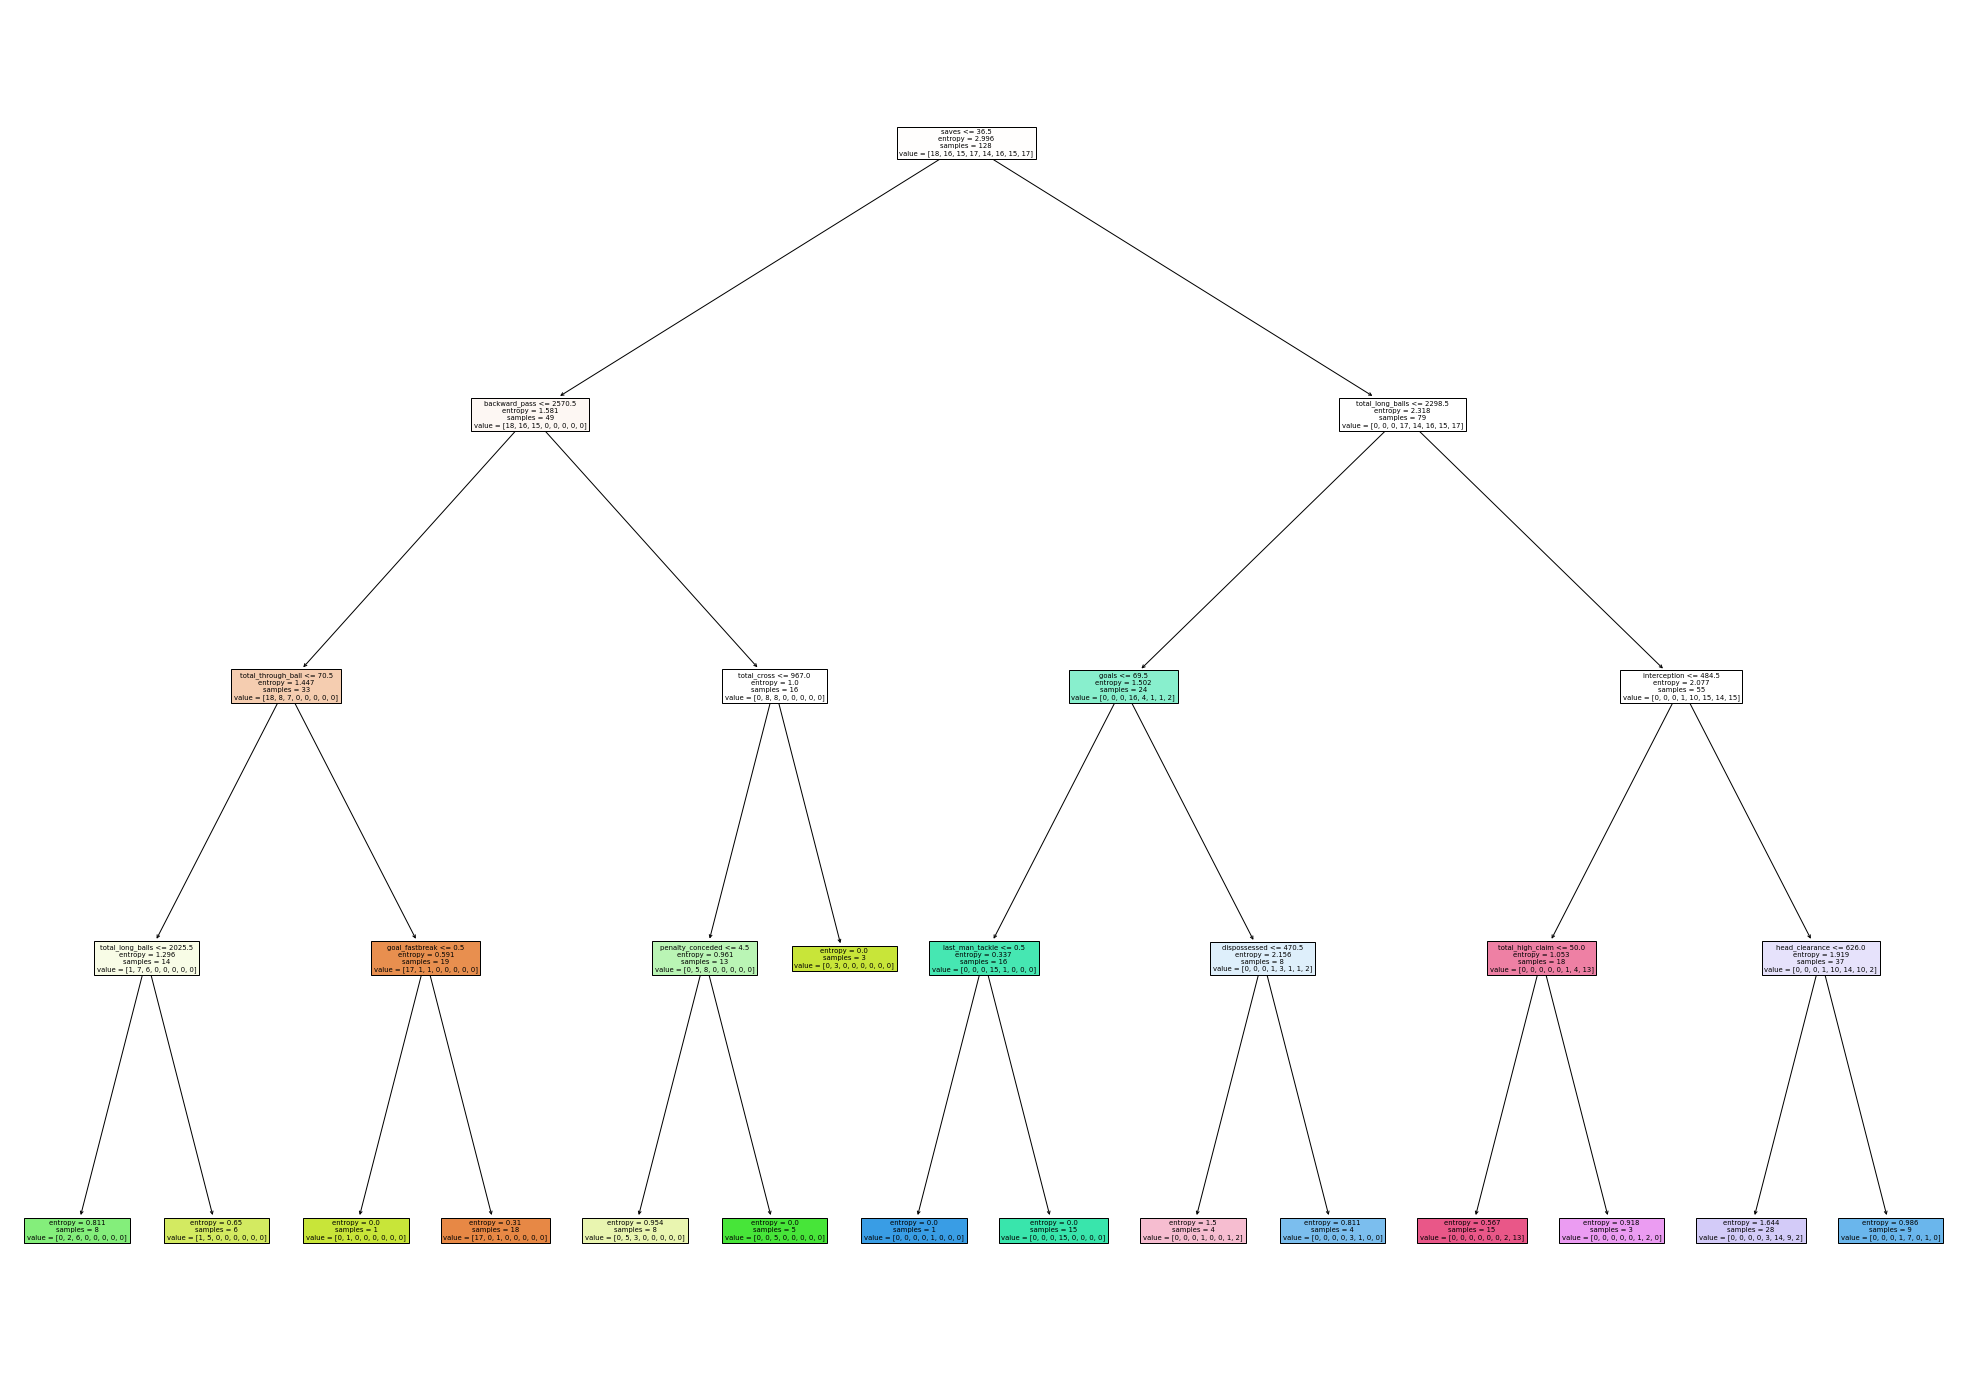

In [ ]:
model=DecisionTreeClassifier(max_depth=4,criterion="entropy")
model.fit(X_train,y_train)


fig= plt.figure(figsize=(35,25))
ptree = tree.plot_tree(model,feature_names=data.columns.values,filled=True)
for p in ptree:
    arrow = p.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
round(rf_acc, 2)

0.75

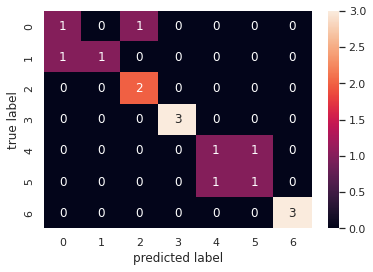

In [ ]:
sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, annot=True, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('true label');

In [ ]:
feature_names = np.array(data.columns)
feature_list = sorted(list(zip(feature_names, model_rf.feature_importances_)), key = lambda x: x[1], reverse = True)
feature_list

[('saves', 0.09988566798091497),
 ('total_long_balls', 0.06844103285142368),
 ('interception', 0.053069757277148515),
 ('total_tackle', 0.05205670355883579),
 ('total_high_claim', 0.04388649880708502),
 ('head_clearance', 0.04052197498814926),
 ('total_through_ball', 0.03568251175197362),
 ('last_man_tackle', 0.03430710875801946),
 ('total_yel_card', 0.02918562933774278),
 ('total_clearance', 0.02882046343770644),
 ('big_chance_missed', 0.02643176504302912),
 ('total_cross', 0.02631862914117287),
 ('total_offside', 0.02563937881228692),
 ('total_pass', 0.02527870846281222),
 ('punches', 0.024967986658504512),
 ('ontarget_scoring_att', 0.02334029770408446),
 ('backward_pass', 0.02266597641813323),
 ('dispossessed', 0.022118551894419348),
 ('losses', 0.01951492865782136),
 ('goals_conceded', 0.019500123392473024),
 ('corner_taken', 0.01933555094567592),
 ('total_scoring_att', 0.01923756759259568),
 ('touches', 0.01923635540925803),
 ('outfielder_block', 0.018610956327715523),
 ('hit_wood

Text(0.5, 1.0, 'Feature Importances')

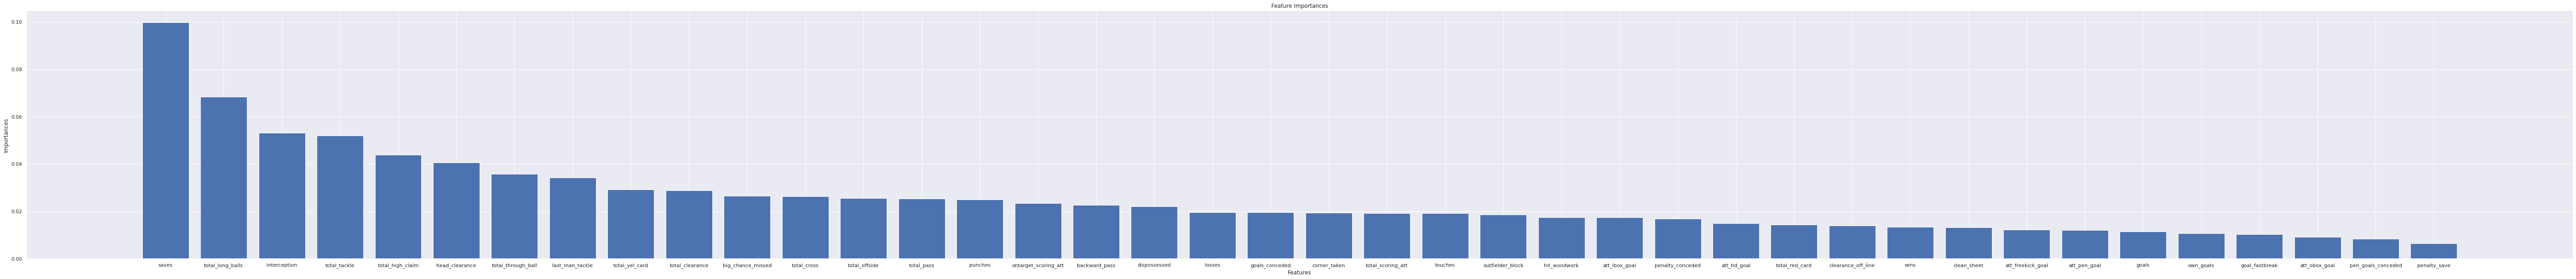

In [ ]:
fig, ax = plt.subplots(figsize=(100, 10))
arr_sorted=[]
for i in range(len(feature_list)):
  arr_sorted.append(feature_list[i][1])

fnames_sorted =[]
for i in range(len(feature_list)):
  fnames_sorted.append(feature_list[i][0])

x=np.arange(0,len(arr_sorted))
ax.set_xticks(x)
ax.set_xticklabels(fnames_sorted)
ax.bar(x,arr_sorted)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature Importances")